<a href="https://colab.research.google.com/github/samarthlawania/Machine-Learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd

In [142]:
df = pd.read_csv('/content/placement (1).csv')

In [143]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [145]:
df.shape

(100, 4)

In [146]:
df = df.iloc[:,1:]

In [147]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


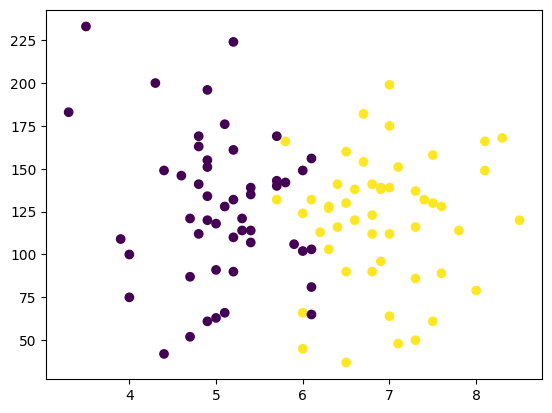

In [148]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [149]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [150]:
print(X)
print(Y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [152]:
X_train

,cgpa,iq
72,7.3,116.0
71,6.1,132.0
47,5.2,161.0
27,6.0,124.0
2,5.3,121.0
...,...,...
85,5.8,166.0
17,3.3,183.0
99,6.2,113.0
62,6.0,102.0


In [153]:
Y_train

,placement
72,1
71,1
47,0
27,1
2,0
...,...
85,1
17,0
99,1
62,0


In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [155]:
X_train

array([[ 1.15253006, -0.19429347],
       [ 0.10916672,  0.20596776],
       [-0.67335578,  0.93144123],
       [ 0.02221977,  0.00583714],
       [-0.58640884, -0.06921184],
       [ 0.10916672, -1.06986491],
       [ 1.32642395, -1.57019144],
       [-0.49946189, -0.24432612],
       [-0.93419662,  0.25600041],
       [ 1.15253006, -1.84537104],
       [-1.02114356,  1.13157185],
       [ 0.71779533, -0.84471797],
       [ 0.97863617,  0.68127796],
       [ 0.4569545 ,  0.1559351 ],
       [-0.84724967, -0.14426082],
       [ 1.84810561,  0.63124531],
       [-0.93419662,  0.78134327],
       [-1.02114356,  0.4311147 ],
       [-0.67335578,  2.50746982],
       [ 1.15253006, -0.94478327],
       [-1.71671912, -1.21996287],
       [ 0.28306061,  0.10590245],
       [-0.23862106,  0.40609837],
       [ 2.19589339, -0.09422816],
       [-0.49946189,  0.38108204],
       [-0.15167411,  0.45613102],
       [-1.36893134,  0.63124531],
       [ 0.28306061,  0.08088612],
       [ 0.97863617,

In [156]:
X_test = sc.transform(X_test)

In [157]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [158]:
model.fit(X_train,Y_train)

LogisticRegression()

In [159]:
y_pred = model.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.8


<Axes: >

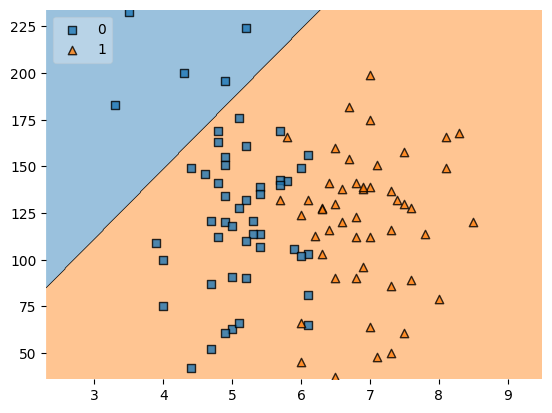

In [161]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.values,y=Y.values,clf=model,legend=2)

In [162]:
import pickle
pickle.dump(model,open('model.pkl','wb'))